# Getting started with Keras

## The task:
In next example we will create a simple binary classifier that predicts whether a person is an adult or a child based on their height and weight

## Simple Solution

### Import necessary libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense


### Generate some dummy train data

134.8170386980667
219.13483761189997
83.71346304589605
154.34767772414665


<AxesSubplot: >

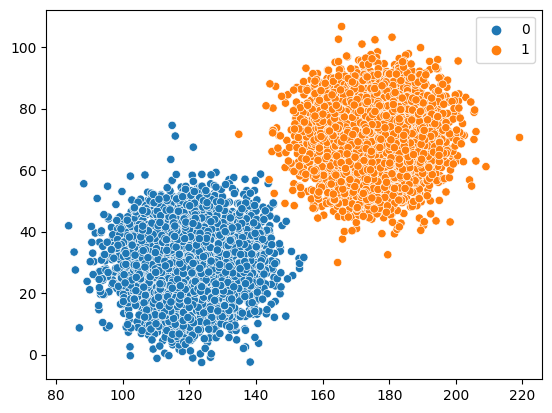

In [14]:
# Generate random height and weight data for adults and children
adult_size = 5000
child_size = 5000
scale = 10

adult_heights = np.random.normal(loc=175, scale=scale, size=adult_size)
adult_weights = np.random.normal(loc=70, scale=scale, size=adult_size)
child_heights = np.random.normal(loc=120, scale=scale, size=child_size)
child_weights = np.random.normal(loc=30, scale=scale, size=child_size)

# Combine the height and weight data and create labels for adults and children
heights = np.concatenate((adult_heights, child_heights))
weights = np.concatenate((adult_weights, child_weights))
adult_labels = np.ones(adult_size, dtype=int)
child_labels = np.zeros(child_size, dtype=int)
labels = np.concatenate((adult_labels, child_labels))

# Shuffle and join the data
indices = np.arange(len(labels))
np.random.shuffle(indices)
data = np.stack((heights[indices], weights[indices]), axis=-1)
labels = labels[indices]

# print data with labels
# for i in range(5):
#     print(f'{data[i,:]} => {labels[i]}')
    # print(adult_heights[i])
    # print(child_heights[i])

print(adult_heights.min())
print(adult_heights.max())

print(child_heights.min())
print(child_heights.max())

### plot the data
sns.scatterplot(data=data, x=data[:,0], y=data[:,1], hue=labels)

### Define model architecture

We will create a neural network model with two sequential dense layers (a layer of neurons in which each neuron is connected to every neuron in the preceding layer):

1. The first one will be the input layer with 4 units (neurons) and uses the relu activation function. It also has an input dimentions of 2, which specifies that the input data to the neural network has two features.

2. The second dense layer - the output one - has 1 unit and uses the sigmoid activation function. This layer is used for binary classification problems, where the output is a single probability value between 0 and 1 indicating the probability of the input belonging to the positive class.

With Sequential() function, we create a model object to which we add layers, one at a time, using the .add() method. This is a simple and straightforward way to create a neural network in Keras.

In [15]:
model = Sequential()
model.add(Dense(units=4, input_dim=2,activation="relu"))
model.add(Dense(units=1,activation='sigmoid'))

# best_hyperparams = {'dropout_rate': 0.4, 'learning_rate': 0.01, 'num_units': 128}

#### How to select the optimal number of units in a layer?

The optimal number of units for a given layer depends on several factors, including the complexity of the problem, the size of the training data, and the architecture of the neural network. 
Here are some general guidelines that you can follow to set the number of units in a layer:

*Start with a small number of units*: It's usually a good idea to start with a small number of units and gradually increase the number as needed. This can help prevent overfitting and reduce the computational cost of training the network.

*Use a rule of thumb*: There are several rules of thumb for determining the number of units in a layer, such as the "sqrt" rule, which suggests using the square root of the number of inputs to the layer (i.e. number of features), or the "2/3" rule, which suggests using 2/3 of the number of inputs to the layer. These rules can provide a starting point for setting the number of units, but they may not be optimal for all problems.

Experiment with different values: The best way to determine the optimal number of units for a given layer is to experiment with different values and evaluate the performance of the network on a validation set. You can try increasing or decreasing the number of units in the layer and see how it affects the performance of the network.

### Compile and fit the model

In [17]:
# Compile your model
model.compile(loss='binary_crossentropy',
            #   optimizer='sgd',              
              optimizer=keras.optimizers.SGD(learning_rate=0.1),              
              metrics=['accuracy'])

# Train the model
model.fit(data, labels, epochs=5, batch_size=32)


Epoch 1/5
313/313 [==============================] - 2s 3ms/step - loss: 0.6934 - accuracy: 0.5030
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4970
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.4970
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5032
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.4794


### Test the model

In [18]:
def test_model():
    # Define 10 test cases
    test_cases = [
        {'input': [170, 60], 'expected_output': 1},
        {'input': [140, 40], 'expected_output': 0},
        {'input': [150, 50], 'expected_output': 1},
        {'input': [130, 60], 'expected_output': 0},
        {'input': [160, 70], 'expected_output': 1},
        {'input': [120, 30], 'expected_output': 0},
        {'input': [180, 80], 'expected_output': 1},
        {'input': [140, 50], 'expected_output': 0},
        {'input': [160, 50], 'expected_output': 0},
        {'input': [150, 70], 'expected_output': 1}
    ]
    # Evaluate the model on the test cases
    num_passed = 0
    num_failed = 0
    for i, test_case in enumerate(test_cases):
        input_data = np.array(test_case['input']).reshape(1, 2)
        expected_output = test_case['expected_output']
        predicted_output = model.predict(input_data)[0][0].round()
        if predicted_output == expected_output:
            num_passed += 1
            # print(f'Test case {i+1} PASSED')
        else:
            num_failed += 1
            # print(f'Test case {i+1} FAILED')
            print(f'failed: {test_case}')

    # Print summary
    print(f'{num_passed} test cases PASSED')
    print(f'{num_failed} test cases FAILED')

test_model()

1/1 [==============================] - 0s 67ms/step
failed: {'input': [170, 60], 'expected_output': 1}
1/1 [==============================] - 0s 29ms/step
failed: {'input': [150, 50], 'expected_output': 1}
1/1 [==============================] - 0s 26ms/step
failed: {'input': [160, 70], 'expected_output': 1}
1/1 [==============================] - 0s 30ms/step
failed: {'input': [180, 80], 'expected_output': 1}
1/1 [==============================] - 0s 43ms/step
failed: {'input': [150, 70], 'expected_output': 1}
5 test cases PASSED
5 test cases FAILED


### Improve model performance: tune model hyperparameters

We see that model performance is not quite good. We can improve it by:

1. Increasing the amount of training data: The more data you have, the better your model can learn to generalize to new examples. You could try generating more training data or finding additional real-world data to add to your training set.

2. Improve the quality of the training data: Make sure that your training data is representative of the problem you're trying to solve and that it is labeled correctly. If your training data contains errors or is biased, your model's performance will suffer.

3. Adjust the model architecture: Experiment with different numbers of layers, units, and activation functions in your model. You could also try adding regularization (such as dropout or weight decay) to prevent overfitting.

4. Tune the hyperparameters: The hyperparameters (such as learning rate, batch size, and number of epochs) can have a big impact on your model's performance. Try different combinations of hyperparameters and use a validation set to evaluate their effectiveness.

We can can use  [Scikit-Learn GridSearchCV function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to tune the hyperparameters of our model and KerasClassifier function that allows to use a Keras model as a Scikit-learn estimator.


### GridSearchCV

`GridSearchCV(estimator=model, param_grid=param_grid, cv=3)`

where arguments are: 

estimator: This is the model to be trained and tuned. In this case, it is a Keras model that has been wrapped with the KerasClassifier function.

param_grid: This is a dictionary or a list of dictionaries that defines the hyperparameters to be tuned and their possible values. Each key in the dictionary corresponds to a hyperparameter of the estimator, and each value is a list of possible values for that hyperparameter. For example, param_grid = {'num_units': [32, 64, 128], 'dropout_rate': [0.0, 0.2, 0.5], 'learning_rate': [0.01, 0.001, 0.0001]} defines a grid search over the hyperparameters num_units, dropout_rate, and learning_rate, with each hyperparameter taking on three possible values.

cv: This is the number of folds in the cross-validation procedure. In this case, cv=3 specifies that a 3-fold cross-validation will be used.

When GridSearchCV is executed with these arguments, it will perform a search over the parameter grid defined by param_grid using cross-validation with cv folds. It will fit the model for each combination of hyperparameters in the grid, and then evaluate the performance of each combination using cross-validation. Finally, it will return the best hyperparameters and their corresponding performance score.

#### KerasClassifier.


The KerasClassifier function is a wrapper function provided by the Keras library that allows you to use a Keras model as a Scikit-learn estimator. 
The KerasClassifier function takes as input a function that creates and returns a Keras model, and returns a Scikit-learn estimator that can be used in Scikit-learn pipelines, cross-validation, and grid search.

`KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)`

where arguments are:

build_fn: This is a function that creates and returns a Keras model. The function should take no arguments and should return a compiled Keras model.

epochs: This is the number of times the entire training dataset will be passed through the neural network during training.

batch_size: This is the number of samples that will be propagated through the neural network at once during training.

verbose: This controls the verbosity of the output during training. Setting verbose=0 means that no output will be printed during training.




In [20]:
# Import necessary libraries
# import numpy as np
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV


# Define a function to create the model with a given set of hyperparameters
def create_model(learning_rate=0.1, num_units=2, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(units=num_units, activation='relu', input_dim=2))
    model.add(Dense(units=1, activation='sigmoid'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

# Create a KerasClassifier object with the create_model function and fit it to the training data
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)
model.fit(data, labels)

# Define a dictionary of hyperparameters and their values to test
param_grid = {
    'learning_rate': [0.01, 0.1, 1.0],
    'num_units': [32, 64, 128],
    'dropout_rate': [0.0, 0.2, 0.4]
}

# Use GridSearchCV to find the best set of hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(data, labels)

# Print the best set of hyperparameters and the corresponding accuracy
print(f'Best: {grid_result.best_params_}, Accuracy: {grid_result.best_score_}')


In [21]:
### create a new instance of your model with the optimal settings.

# Define the best hyperparameters found by GridSearchCV
best_hyperparams = {'dropout_rate': 0.4, 'learning_rate': 0.01, 'num_units': 164}

# Create a new model instance with the best hyperparameters
model = create_model(**best_hyperparams)

# Train the model on your training data
model.fit(data, labels, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
313/313 [==============================] - 2s 3ms/step - loss: 0.6479 - accuracy: 0.8321
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3280 - accuracy: 0.8434
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3208 - accuracy: 0.8491
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.8516
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3072 - accuracy: 0.8534
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3046 - accuracy: 0.8522
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2945 - accuracy: 0.8578
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2906 - accuracy: 0.8604
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.8646
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.8691

In [22]:
test_model()

1/1 [==============================] - 0s 25ms/step
failed: {'input': [150, 50], 'expected_output': 1}
1/1 [==============================] - 0s 27ms/step
failed: {'input': [130, 60], 'expected_output': 0}
1/1 [==============================] - 0s 30ms/step
failed: {'input': [140, 50], 'expected_output': 0}
1/1 [==============================] - 0s 32ms/step
7 test cases PASSED
3 test cases FAILED
